# Decision Trees Classification Model

## Reading in processed data

In [1]:
# Basic imports
import numpy as np 
import pandas as pd 

# Acquire data from google drive
from google.colab import drive
drive.mount('/content/drive')

# Reading in processed data
train_data = pd.read_feather('/content/drive/My Drive/Colab Notebooks/training_data_processed_feather.feather')
test_data = pd.read_feather('/content/drive/My Drive/Colab Notebooks/testing_data_processed_feather.feather')





Mounted at /content/drive


## Memory Usage Reduction 

In [2]:
# Reducing memory usage func
def reduce_mem_usage(df):

    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')


    return df
# Implementing memory reduction func
train_data = reduce_mem_usage(train_data)
test_data = reduce_mem_usage(test_data)

## Creating pipeline to encode data before going through classifier

In [3]:
# Imports for encoding data before model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


# Transformer for categorical features such as objects and boolean.
categorical_features = []
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# Transformer for numerical features such as floats and integers
numeric_features = ['index', 'building_id', 'square_feet', 'primary_use', 'meter',
       'air_temperature', 'day_of_year', 'hour', 'isDayTime', 'day_of_week']
                    
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

# Combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

## Producing the X and y train values that will train the data

In [4]:
# Producing the training values
X_train = train_data.drop("meter_reading", axis = 1)

y_train = (train_data['meter_reading']).astype(int)

# Deleting as no longer necessary to reduce memory
#del train_data

## Hyperparameter Tuning

Tuning max_depth hyperparameter

In [5]:

# Hyper parameter testing
max_depth_test = np.arange(1,101,10)
from sklearn.tree import DecisionTreeClassifier


from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df_x = X_train[0:75000]
df_y = y_train[0:75000]

X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(df_x, df_y, test_size=0.33, random_state=42)
acc_score=[]
# KNN pipeline
for i in max_depth_test:
  # K-NEAREST NEIGHBOUR CLASSIFICATION
  DTClassifier = Pipeline(
      [
       ('preprocessing', preprocessor),
      ('classifier', DecisionTreeClassifier(criterion="gini", random_state=42, 
                                            max_depth=i))
      ]
  )
  DTClassifier.fit(X = X_train_hyp, y = y_train_hyp)
  test_hyp = DTClassifier.predict(X_test_hyp)
  acc_score.append(accuracy_score(test_hyp, y_test_hyp))

best_max_depth_index = acc_score.index(max(acc_score))
best_max = max_depth_test[best_max_depth_index]




41


Tuning random state hyperparameter

In [6]:
# Creating loop for random state test
acc2_score=[]
random_state_test = np.arange(1,101,10)
for i in random_state_test:
  # K-NEAREST NEIGHBOUR CLASSIFICATION
  DTClassifier = Pipeline(
      [
       ('preprocessing', preprocessor),
      ('classifier', DecisionTreeClassifier(criterion="gini", random_state=i, 
                                            max_depth=best_max))
      ]
  )
  DTClassifier.fit(X = X_train_hyp, y = y_train_hyp)
  test_hyp = DTClassifier.predict(X_test_hyp)
  acc2_score.append(accuracy_score(test_hyp, y_test_hyp))

best_random_state_index = acc2_score.index(max(acc2_score))
best_max_rs = random_state_test[best_random_state_index]
print(best_max_rs)


1


Plotting hyperparameter tuning results

Text(0, 0.5, 'Accuracy Score')

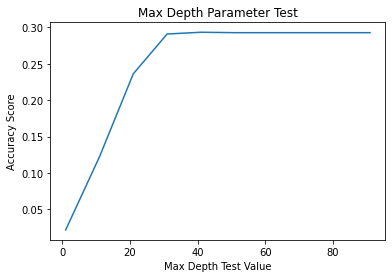

In [7]:
import matplotlib.pyplot as plt

# Plotting the accuracy for the hyperparameter
plt.plot(max_depth_test,acc_score)
plt.title("Max Depth Parameter Test")
plt.xlabel("Max Depth Test Value")
plt.ylabel("Accuracy Score")


Text(0, 0.5, 'Accuracy Score')

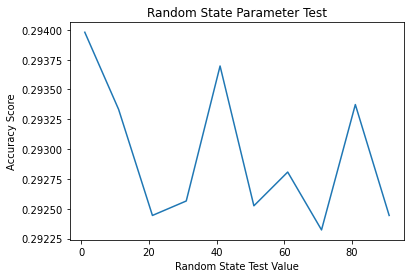

In [8]:
# Plotting the accuracy for the hyperparameter
plt.plot(random_state_test,acc2_score)
plt.title("Random State Parameter Test")
plt.xlabel("Random State Test Value")
plt.ylabel("Accuracy Score")

Best random state is 1 and due to memory restrictions best max depth that can be used is 14

In [9]:
# Deleting unnecessary values for memory usage reduction
del acc_score, acc2_score, y_test_hyp, X_train_hyp

## Fitting and Predicting

## Classification Pipeline

In [10]:

# K-NEAREST NEIGHBOUR CLASSIFICATION


# KNN pipeline
DTClassifier = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('classifier', DecisionTreeClassifier(criterion="gini", random_state=1, max_depth = 14))
    ]
)



Fitting data

In [ ]:
# Inputting the training data through the classifications

DTClassifier.fit(X = X_train, y = y_train)




Predicting data

In [14]:
# Using the test data to produce predicted revenue values

# Creating steops of 20000 to loop through the test data
steps = np.arange(0,len(test_data), 20000)
DT_pred=[]
# Looping through at 20000 values at a time to reduce memory used
for i in steps:
  test_data_sample = test_data[i:i+20000]
  DT_pred.append(DTClassifier.predict(test_data_sample))
  print(i)

0
20000
40000
60000
80000
100000
120000
140000
160000
180000
200000
220000
240000
260000
280000
300000
320000
340000
360000
380000
400000
420000
440000
460000
480000
500000
520000
540000
560000
580000
600000
620000
640000
660000
680000
700000
720000
740000
760000
780000
800000
820000
840000
860000
880000
900000
920000
940000
960000
980000
1000000
1020000
1040000
1060000
1080000
1100000
1120000
1140000
1160000
1180000
1200000
1220000
1240000
1260000
1280000
1300000
1320000
1340000
1360000
1380000
1400000
1420000
1440000
1460000
1480000
1500000
1520000
1540000
1560000
1580000
1600000
1620000
1640000
1660000
1680000
1700000
1720000
1740000
1760000
1780000
1800000
1820000
1840000
1860000
1880000
1900000
1920000
1940000
1960000
1980000
2000000
2020000
2040000
2060000
2080000
2100000
2120000
2140000
2160000
2180000
2200000
2220000
2240000
2260000
2280000
2300000
2320000
2340000
2360000
2380000
2400000
2420000
2440000
2460000
2480000
2500000
2520000
2540000
2560000
2580000
2600000
2620000
264

In [15]:
# Un-nesting the list created
from itertools import chain
a = list(chain.from_iterable(DT_pred))
print(len(a))
max(a)


41697600


46656

## Creating dataframe for predicted values for Kaggle upload

In [16]:
# Creating row_id (index)
row_id = np.arange(start = 0, stop = int(len(a)))

In [17]:
# Combine into a dataframe for exporting
df = pd.DataFrame({"row_id":row_id, "meter_reading":a})

# Exporting as csv
df.to_csv('/content/drive/My Drive/Colab Notebooks/DT_Model_3.csv', index=False)